In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn 
import seaborn as sns

In [2]:
torn_data = pd.read_csv("/Weather Data/1950-2022_torn.csv")
torn_data.head()

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
0,192,1950,10,1,1950-10-01,21:00:00,3,OK,40,23,...,15.8,10,1,1,1,25,0,0,0,0
1,193,1950,10,9,1950-10-09,02:15:00,3,NC,37,9,...,2.0,880,1,1,1,47,0,0,0,0
2,195,1950,11,20,1950-11-20,02:20:00,3,KY,21,1,...,0.1,10,1,1,1,177,0,0,0,0
3,196,1950,11,20,1950-11-20,04:00:00,3,KY,21,2,...,0.1,10,1,1,1,209,0,0,0,0
4,197,1950,11,20,1950-11-20,07:30:00,3,MS,28,14,...,2.0,37,1,1,1,101,0,0,0,0


In [3]:
torn_data_recent = torn_data[torn_data["yr"] >= 2000]
torn_data_recent.head()

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
41142,1059,2000,10,13,2000-10-13,17:45:00,3,IA,19,44,...,14.0,50,1,1,1,151,147,0,0,0
41143,540,2000,10,20,2000-10-20,17:35:00,3,KS,20,42,...,1.0,100,1,1,1,57,0,0,0,0
41144,561,2000,10,21,2000-10-21,16:41:00,3,OK,40,39,...,4.0,30,1,1,1,33,0,0,0,0
41145,559,2000,10,22,2000-10-22,11:01:00,3,TX,48,119,...,0.3,0,1,1,1,469,0,0,0,0
41146,560,2000,10,22,2000-10-22,11:40:00,3,TX,48,120,...,2.5,20,1,1,1,133,0,0,0,0


In [4]:
print ("Number of datapoints: " + str(len(torn_data_recent)))

Number of datapoints: 28895


In [5]:
print ("Data columns:", list(torn_data_recent.columns))

Data columns: ['om', 'yr', 'mo', 'dy', 'date', 'time', 'tz', 'st', 'stf', 'stn', 'mag', 'inj', 'fat', 'loss', 'closs', 'slat', 'slon', 'elat', 'elon', 'len', 'wid', 'ns', 'sn', 'sg', 'f1', 'f2', 'f3', 'f4', 'fc']


In [6]:
midwest_states = ["ND", "SD", "MN", "WI", "MI", "NE", "IA", "KS", "MO", "IL", "IN", "OH"]

recent_midwest_torn_data = torn_data_recent[torn_data_recent["st"].isin(midwest_states)]
recent_midwest_torn_data.head()


,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
41142,1059,2000,10,13,2000-10-13,17:45:00,3,IA,19,44,...,14.0,50,1,1,1,151,147,0,0,0
41143,540,2000,10,20,2000-10-20,17:35:00,3,KS,20,42,...,1.0,100,1,1,1,57,0,0,0,0
41158,541,2000,10,24,2000-10-24,17:30:00,3,KS,20,43,...,0.4,40,1,1,1,185,0,0,0,0
41160,542,2000,10,25,2000-10-25,15:26:00,3,KS,20,44,...,1.5,150,1,1,1,57,0,0,0,0
41161,543,2000,10,27,2000-10-27,17:13:00,3,KS,20,45,...,0.2,80,1,1,1,69,0,0,0,0


In [7]:
len(recent_midwest_torn_data)

11245

In [8]:
recent_midwest_torn_data.isna().sum()

om       0
yr       0
mo       0
dy       0
date     0
time     0
tz       0
st       0
stf      0
stn      0
mag      0
inj      0
fat      0
loss     0
closs    0
slat     0
slon     0
elat     0
elon     0
len      0
wid      0
ns       0
sn       0
sg       0
f1       0
f2       0
f3       0
f4       0
fc       0
dtype: int64

In [9]:
recent_midwest_torn_data.head()

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
41142,1059,2000,10,13,2000-10-13,17:45:00,3,IA,19,44,...,14.0,50,1,1,1,151,147,0,0,0
41143,540,2000,10,20,2000-10-20,17:35:00,3,KS,20,42,...,1.0,100,1,1,1,57,0,0,0,0
41158,541,2000,10,24,2000-10-24,17:30:00,3,KS,20,43,...,0.4,40,1,1,1,185,0,0,0,0
41160,542,2000,10,25,2000-10-25,15:26:00,3,KS,20,44,...,1.5,150,1,1,1,57,0,0,0,0
41161,543,2000,10,27,2000-10-27,17:13:00,3,KS,20,45,...,0.2,80,1,1,1,69,0,0,0,0


In [10]:
recent_midwest_torn_data.tail()

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
70001,621866,2022,8,1,2022-08-01,04:12:00,3,IL,17,0,...,1.88,60,1,1,1,107,0,0,0,0
70002,621867,2022,8,1,2022-08-01,11:56:00,3,MI,26,0,...,2.35,200,1,1,1,157,0,0,0,0
70003,621868,2022,8,1,2022-08-01,12:14:00,3,MI,26,0,...,0.41,100,1,1,1,157,0,0,0,0
70014,621904,2022,9,18,2022-09-18,23:28:00,3,IL,17,0,...,2.97,30,1,1,1,113,0,0,0,0
70035,621900,2022,9,4,2022-09-04,15:44:00,3,OH,39,0,...,0.07,15,1,1,1,99,0,0,0,0


In [11]:
recent_midwest_torn_data.columns

Index(['om', 'yr', 'mo', 'dy', 'date', 'time', 'tz', 'st', 'stf', 'stn', 'mag',
       'inj', 'fat', 'loss', 'closs', 'slat', 'slon', 'elat', 'elon', 'len',
       'wid', 'ns', 'sn', 'sg', 'f1', 'f2', 'f3', 'f4', 'fc'],
      dtype='object')

In [12]:
recent_midwest_torn_data.to_csv("cleaned_tornado_data.csv")

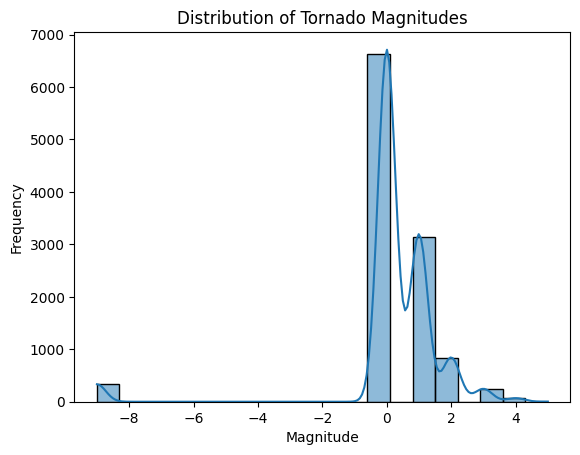

In [13]:
sns.histplot(data=recent_midwest_torn_data, x='mag', bins=20, kde=True)
plt.title('Distribution of Tornado Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

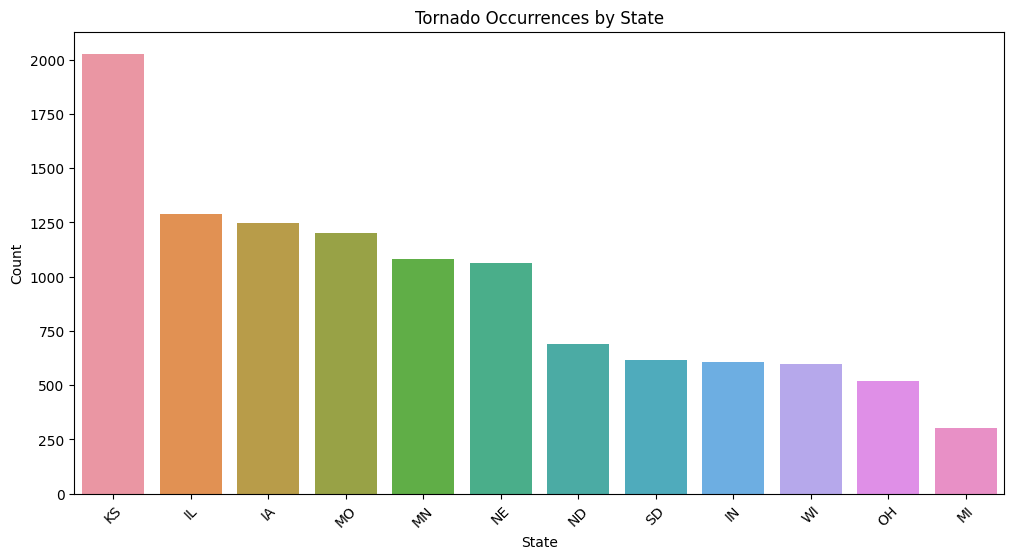

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(data=recent_midwest_torn_data, x='st', order=recent_midwest_torn_data['st'].value_counts().index)
plt.title('Tornado Occurrences by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [15]:
recent_midwest_torn_data = pd.get_dummies(recent_midwest_torn_data, columns = ['st'])
recent_midwest_torn_data


,om,yr,mo,dy,date,time,tz,stf,stn,mag,...,st_IN,st_KS,st_MI,st_MN,st_MO,st_ND,st_NE,st_OH,st_SD,st_WI
41142,1059,2000,10,13,2000-10-13,17:45:00,3,19,44,1,...,False,False,False,False,False,False,False,False,False,False
41143,540,2000,10,20,2000-10-20,17:35:00,3,20,42,0,...,False,True,False,False,False,False,False,False,False,False
41158,541,2000,10,24,2000-10-24,17:30:00,3,20,43,0,...,False,True,False,False,False,False,False,False,False,False
41160,542,2000,10,25,2000-10-25,15:26:00,3,20,44,0,...,False,True,False,False,False,False,False,False,False,False
41161,543,2000,10,27,2000-10-27,17:13:00,3,20,45,0,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70001,621866,2022,8,1,2022-08-01,04:12:00,3,17,0,1,...,False,False,False,False,False,False,False,False,False,False
70002,621867,2022,8,1,2022-08-01,11:56:00,3,26,0,0,...,False,False,True,False,False,False,False,False,False,False
70003,621868,2022,8,1,2022-08-01,12:14:00,3,26,0,0,...,False,False,True,False,False,False,False,False,False,False
70014,621904,2022,9,18,2022-09-18,23:28:00,3,17,0,0,...,False,False,False,False,False,False,False,False,False,False


In [16]:
states = ["st_ND", "st_SD", "st_MN", "st_WI", "st_MI", "st_NE", "st_IA", "st_KS", "st_MO", "st_IL", "st_IN", "st_OH"]



convert_dict = {'st_ND': int, 'st_SD': int, 'st_MN': int, 'st_WI': int, 'st_MI': int, 'st_NE': int, 
                'st_IA': int, 'st_KS': int, 'st_MO': int, 'st_IL': int, 'st_IN': int, 'st_OH': int}

 
recent_midwest_torn_data = recent_midwest_torn_data.astype(convert_dict)

In [17]:
recent_midwest_torn_data.head()

,om,yr,mo,dy,date,time,tz,stf,stn,mag,...,st_IN,st_KS,st_MI,st_MN,st_MO,st_ND,st_NE,st_OH,st_SD,st_WI
41142,1059,2000,10,13,2000-10-13,17:45:00,3,19,44,1,...,0,0,0,0,0,0,0,0,0,0
41143,540,2000,10,20,2000-10-20,17:35:00,3,20,42,0,...,0,1,0,0,0,0,0,0,0,0
41158,541,2000,10,24,2000-10-24,17:30:00,3,20,43,0,...,0,1,0,0,0,0,0,0,0,0
41160,542,2000,10,25,2000-10-25,15:26:00,3,20,44,0,...,0,1,0,0,0,0,0,0,0,0
41161,543,2000,10,27,2000-10-27,17:13:00,3,20,45,0,...,0,1,0,0,0,0,0,0,0,0


In [18]:
nn_torn_df = recent_midwest_torn_data.drop(columns = ["date", "yr", "mo", "time", "dy", "tz"], axis = 1)

In [19]:
nn_torn_df.columns

Index(['om', 'stf', 'stn', 'mag', 'inj', 'fat', 'loss', 'closs', 'slat',
       'slon', 'elat', 'elon', 'len', 'wid', 'ns', 'sn', 'sg', 'f1', 'f2',
       'f3', 'f4', 'fc', 'st_IA', 'st_IL', 'st_IN', 'st_KS', 'st_MI', 'st_MN',
       'st_MO', 'st_ND', 'st_NE', 'st_OH', 'st_SD', 'st_WI'],
      dtype='object')

In [20]:
nn_torn_df.head()

,om,stf,stn,mag,inj,fat,loss,closs,slat,slon,...,st_IN,st_KS,st_MI,st_MN,st_MO,st_ND,st_NE,st_OH,st_SD,st_WI
41142,1059,19,44,1,0,0,0.08,0.0,42.83,-94.70,...,0,0,0,0,0,0,0,0,0,0
41143,540,20,42,0,0,0,0.00,0.0,37.67,-100.12,...,0,1,0,0,0,0,0,0,0,0
41158,541,20,43,0,0,0,0.00,0.0,37.85,-98.75,...,0,1,0,0,0,0,0,0,0,0
41160,542,20,44,0,0,0,0.00,0.0,37.73,-99.80,...,0,1,0,0,0,0,0,0,0,0
41161,543,20,45,0,0,0,0.00,0.0,37.83,-100.40,...,0,1,0,0,0,0,0,0,0,0


In [21]:
def train_validate_test_split(df, train_percent=0.7, validate_percent=0.2, seed=21):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)

    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end

    train = df.loc[perm[:train_end]]
    validate = df.loc[perm[train_end:validate_end]]
    test = df.loc[perm[validate_end:]]

    return train, validate, test



train_data, val_data, test_data = train_validate_test_split(nn_torn_df)

In [22]:
len(train_data), len(val_data), len(test_data)

(7871, 2249, 1125)

In [23]:
X_train = train_data.drop(columns=["loss"], axis = 1)
y_train = train_data["loss"]

X_test = test_data.drop(columns=["loss"], axis = 1)
y_test = test_data["loss"]

In [24]:
df_min_max_scaled = X_train.copy()

for column in df_min_max_scaled.columns: 
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())     

X_train = df_min_max_scaled

In [25]:
df_min_max_scaled = X_test.copy()

for column in df_min_max_scaled.columns: 
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())     

X_test = df_min_max_scaled
X_test

,om,stf,stn,mag,inj,fat,closs,slat,slon,elat,...,st_IN,st_KS,st_MI,st_MN,st_MO,st_ND,st_NE,st_OH,st_SD,st_WI
68441,0.996852,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.794643,0.147068,0.794781,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53093,0.000119,0.368421,0.000000,0.692308,0.0,0.0,0.0,0.860408,0.032007,0.860573,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
41665,0.001365,0.052632,0.115385,0.692308,0.0,0.0,0.0,0.848980,0.113010,0.849142,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59726,0.853639,0.000000,0.000000,0.769231,0.0,0.0,0.0,0.848747,0.144250,0.848834,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59985,0.855882,0.315789,0.000000,0.769231,0.0,0.0,0.0,0.755657,0.091380,0.755175,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64531,0.991018,0.552632,0.000000,0.692308,0.0,0.0,0.0,0.953878,0.063850,0.954061,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41343,0.000051,0.315789,0.007692,0.692308,0.0,0.0,0.0,0.770000,0.102139,0.770556,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
63400,0.989690,0.368421,0.000000,0.769231,0.0,0.0,0.0,0.872492,0.062924,0.871192,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
55386,0.001712,0.578947,0.153846,0.692308,0.0,0.0,0.0,0.811510,0.206586,0.811605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [26]:
df_min_max_scaled = y_train.copy()
df_min_max_scaled = (df_min_max_scaled - df_min_max_scaled.min()) / (df_min_max_scaled.max() - df_min_max_scaled.min())     
y_train = df_min_max_scaled
y_train

64354    0.000000e+00
69794    4.545455e-02
60334    2.272727e-11
56509    0.000000e+00
51186    0.000000e+00
             ...     
41845    0.000000e+00
45026    4.545455e-12
57080    2.272727e-11
44322    0.000000e+00
58737    0.000000e+00
Name: loss, Length: 7871, dtype: float64

In [27]:
df_min_max_scaled = y_test.copy()
df_min_max_scaled = (df_min_max_scaled - df_min_max_scaled.min()) / (df_min_max_scaled.max() - df_min_max_scaled.min())     
y_test = df_min_max_scaled
y_test

68441    0.000000e+00
53093    2.000000e-12
41665    0.000000e+00
59726    5.000000e-10
59985    1.000000e-10
             ...     
64531    0.000000e+00
41343    1.200000e-10
63400    0.000000e+00
55386    2.000000e-11
54100    1.000000e-09
Name: loss, Length: 1125, dtype: float64

In [28]:
X_train.dtypes

om       float64
stf      float64
stn      float64
mag      float64
inj      float64
fat      float64
closs    float64
slat     float64
slon     float64
elat     float64
elon     float64
len      float64
wid      float64
ns       float64
sn       float64
sg       float64
f1       float64
f2       float64
f3       float64
f4       float64
fc       float64
st_IA    float64
st_IL    float64
st_IN    float64
st_KS    float64
st_MI    float64
st_MN    float64
st_MO    float64
st_ND    float64
st_NE    float64
st_OH    float64
st_SD    float64
st_WI    float64
dtype: object

In [29]:
X_train = X_train.drop(columns = ["fc"], axis = 1)

X_test = X_test.drop(columns = ["fc"], axis = 1)

In [30]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import mean_absolute_error


models = [LinearRegression(), ElasticNet(), GradientBoostingRegressor(), SGDRegressor(), CatBoostRegressor()]

def train_performance(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
   
    mae = mean_absolute_error(y_test, y_pred)
    
    return mae 

In [31]:
df_crop_loss_results = pd.DataFrame(columns=['Model for Loss', 'MAE'])

df_crop_loss_results

,Model for Loss,MAE


In [32]:
for model in models:
    crop_mae = train_performance(model, X_train, y_train, X_test, y_test)

    df_crop_loss_results = pd.concat([df_crop_loss_results, pd.DataFrame([[model.__class__.__name__, crop_mae]], columns=['Model for Loss', 'MAE'])], axis=0)

Learning rate set to 0.056722
0:	learn: 0.0195989	total: 59.2ms	remaining: 59.2s
1:	learn: 0.0193508	total: 64ms	remaining: 31.9s
2:	learn: 0.0190052	total: 67.7ms	remaining: 22.5s
3:	learn: 0.0187383	total: 76.8ms	remaining: 19.1s
4:	learn: 0.0185007	total: 81.9ms	remaining: 16.3s
5:	learn: 0.0182421	total: 87.6ms	remaining: 14.5s
6:	learn: 0.0178968	total: 91ms	remaining: 12.9s
7:	learn: 0.0176471	total: 94ms	remaining: 11.7s
8:	learn: 0.0173144	total: 97.2ms	remaining: 10.7s
9:	learn: 0.0170717	total: 100ms	remaining: 9.91s
10:	learn: 0.0168339	total: 103ms	remaining: 9.28s
11:	learn: 0.0166148	total: 107ms	remaining: 8.8s
12:	learn: 0.0164048	total: 111ms	remaining: 8.43s
13:	learn: 0.0161956	total: 115ms	remaining: 8.12s
14:	learn: 0.0159594	total: 118ms	remaining: 7.76s
15:	learn: 0.0157349	total: 121ms	remaining: 7.44s
16:	learn: 0.0155161	total: 124ms	remaining: 7.18s
17:	learn: 0.0153003	total: 129ms	remaining: 7.01s
18:	learn: 0.0150880	total: 132ms	remaining: 6.8s
19:	learn:

In [33]:
df_crop_loss_results

,Model for Loss,MAE
0,LinearRegression,0.004040
0,ElasticNet,0.001626
0,GradientBoostingRegressor,0.003803
0,SGDRegressor,0.002433
0,CatBoostRegressor,0.002420


In [34]:
import torch 

torch_df_x_train = torch.Tensor(X_train.values)

In [35]:
torch_df_x_train

tensor([[0.9906, 0.0789, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.9996, 0.0789, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.9131, 0.5789, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        ...,
        [0.5052, 0.5526, 0.1348,  ..., 0.0000, 0.0000, 0.0000],
        [0.0013, 0.2368, 0.0426,  ..., 0.0000, 0.0000, 0.0000],
        [0.7150, 0.3684, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])

In [36]:
torch_df_x_train.size()

torch.Size([7871, 32])

In [37]:
torch_df_y_train = torch.Tensor(y_train.values)

torch_df_y_train

tensor([0.0000e+00, 4.5455e-02, 2.2727e-11,  ..., 2.2727e-11, 0.0000e+00,
        0.0000e+00])

In [38]:
torch_df_x_test = torch.Tensor(X_test.values)
torch_df_y_test = torch.Tensor(y_test.values)


In [39]:
torch_df_x_test
torch_df_y_test

tensor([0.0000e+00, 2.0000e-12, 0.0000e+00,  ..., 0.0000e+00, 2.0000e-11,
        1.0000e-09])

In [40]:
import torch
import torch.nn as nn

class NeuralNetworkLossPred(nn.Module):
    def __init__(self):
        super().__init__()
            
        self.linear_layer1 = nn.Linear(in_features=32, out_features=32)
        self.relu1 = nn.ReLU()
        self.linear_layer2 = nn.Linear(in_features=32, out_features=64)
        self.relu2 = nn.ReLU()
        self.linear_layer3 = nn.Linear(in_features=64, out_features=64)
        self.relu3 = nn.ReLU()
        self.linear_layer4 = nn.Linear(in_features=64, out_features=64)
        self.relu4 = nn.ReLU()
        self.linear_layer5 = nn.Linear(in_features=64, out_features=32)
        self.relu5 = nn.ReLU()
        self.linear_layer6 = nn.Linear(in_features=32, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.linear_layer1(x)
        x = self.relu1(x)
        x = self.linear_layer2(x)
        x = self.relu2(x)
        x = self.linear_layer3(x)
        x = self.relu3(x)
        x = self.linear_layer4(x)
        x = self.relu4(x)
        x = self.linear_layer5(x)
        x = self.relu5(x)
        x = self.linear_layer6(x)
        return x

In [41]:
torch.manual_seed(21)

nn_crop_loss = NeuralNetworkLossPred()

list(nn_crop_loss.parameters())

[Parameter containing:
 tensor([[-0.0093,  0.0402, -0.1725,  ...,  0.1721, -0.1389,  0.0195],
         [-0.0744, -0.1051, -0.0197,  ..., -0.0692,  0.1046,  0.0675],
         [-0.0501,  0.0996,  0.0547,  ..., -0.0276,  0.1328, -0.0458],
         ...,
         [ 0.0717, -0.0137, -0.1477,  ..., -0.0916,  0.0636,  0.1576],
         [ 0.0140, -0.0090, -0.1764,  ..., -0.0371, -0.1476, -0.0283],
         [ 0.1141,  0.0248, -0.1085,  ..., -0.0087,  0.0785, -0.0686]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.1479,  0.0973, -0.0636, -0.0634,  0.1285, -0.1274,  0.1269,  0.1658,
          0.1034, -0.0990, -0.0262, -0.1711, -0.1554, -0.0906, -0.1246, -0.1267,
          0.1410, -0.1005, -0.0141, -0.0143,  0.0731, -0.1464, -0.1715, -0.0287,
         -0.1516,  0.0933,  0.0775, -0.0269, -0.0320,  0.0526, -0.0226,  0.1045],
        requires_grad=True),
 Parameter containing:
 tensor([[-1.0726e-01, -8.1256e-02, -5.2257e-02,  ..., -1.1283e-01,
          -1.1240e-01,  1.5753e-01],
  

In [42]:
torch_df_x_train.type

<function Tensor.type>

In [43]:
import torch.optim as optim


#hyperparameters
l1_loss = nn.L1Loss()
optimizer = optim.SGD(params = nn_crop_loss.parameters(), lr = 0.01)
epochs = 250

epoch_count = []
train_loss_count = []
test_loss_count = []

for _ in range(epochs):
    nn_crop_loss.train()

    y_pred = nn_crop_loss(torch_df_x_train)

    if y_pred.shape != torch_df_y_train.shape:
        y_pred = y_pred.squeeze()

    loss = l1_loss(y_pred, torch_df_y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    nn_crop_loss.eval()
    with torch.inference_mode():
        test_pred = nn_crop_loss(torch_df_x_test)

        if test_pred.shape != torch_df_y_test.shape:
            test_pred = test_pred.squeeze()

        test_loss = l1_loss(test_pred, torch_df_y_test)

        epoch_count.append(_)
        train_loss_count.append(loss.item())
        test_loss_count.append(test_loss.item())

        print(f"Epoch: {_} | train loss: {loss} | test loss: {test_loss}")


Epoch: 0 | train loss: 0.10506819188594818 | test loss: 0.0922461450099945
Epoch: 1 | train loss: 0.09184886515140533 | test loss: 0.07891649752855301
Epoch: 2 | train loss: 0.07851679623126984 | test loss: 0.06550658494234085
Epoch: 3 | train loss: 0.06510620564222336 | test loss: 0.051995232701301575
Epoch: 4 | train loss: 0.05159357190132141 | test loss: 0.03840276971459389
Epoch: 5 | train loss: 0.03799532353878021 | test loss: 0.024757729843258858
Epoch: 6 | train loss: 0.02434408664703369 | test loss: 0.01105502899736166
Epoch: 7 | train loss: 0.010636578314006329 | test loss: 0.00460362434387207
Epoch: 8 | train loss: 0.004368182737380266 | test loss: 0.00944217387586832
Epoch: 9 | train loss: 0.009023226797580719 | test loss: 0.00618194043636322
Epoch: 10 | train loss: 0.005941738374531269 | test loss: 0.009286741726100445
Epoch: 11 | train loss: 0.008867999538779259 | test loss: 0.006333802826702595
Epoch: 12 | train loss: 0.006093536503612995 | test loss: 0.009138360619544983

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Crop Loss')]

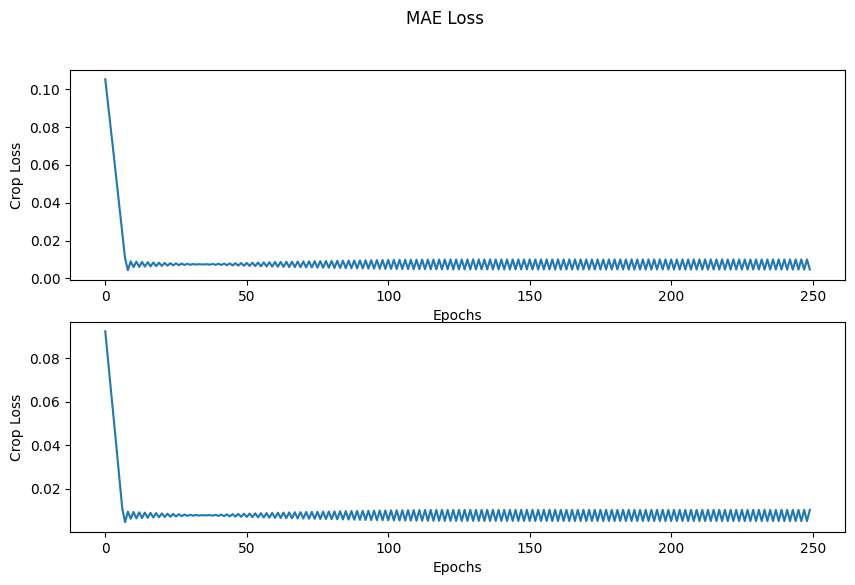

In [45]:
import matplotlib.pyplot as plt

# train_loss_count = torch.numpy(train_loss_count)
# test_loss_count = torch.numpy(test_loss_count)


fig, axs = plt.subplots(2, figsize=(10, 6))
fig.suptitle('MAE Loss')
axs[0].plot(epoch_count, train_loss_count)
axs[0].set(xlabel='Epochs', ylabel='Crop Loss')
axs[1].plot(epoch_count, test_loss_count)
axs[1].set(xlabel='Epochs', ylabel='Crop Loss')